In [1]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

input_shape = (256, 256, 3)
input_layer = Input(shape=input_shape)

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)
base_model.trainable=False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

output_layer = Dense(7, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.load_weights('../src/models/res_net_model_weight.h5')

In [2]:
# import os
# from glob import glob

# dataset_path = "../data/test"
# num_images = 10
# selected_images = []
# class_name = []

# exclude = ['Neck_Blast', 'Rice Hispa']

# for cls_name in sorted(os.listdir(dataset_path)):
#     if cls_name not in exclude:
#         cls_path = os.path.join(dataset_path, cls_name)
#         if os.path.isdir(cls_path):
#             images = sorted(glob(os.path.join(cls_path, "*.jpg")))
#             selected_images.extend(images[:num_images])
#             class_name.extend([cls_name] * num_images)

# print("Total selected:", len(selected_images))
# print("Classes:", class_name)

In [3]:
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet import preprocess_input
# import numpy as np
# import matplotlib.pyplot as plt

# image_array = []

# for img_path in selected_images:
#     img = image.load_img(img_path, target_size=(256, 256))
#     img_array = image.img_to_array(img)
#     img_array = preprocess_input(img_array)
#     image_array.append(img_array)

# image_array = np.array(image_array)
# np.save('../src/image_array/image_array.npy', image_array)

# # Show sample image
# plt.imshow(image_array[0].astype('uint8'))
# plt.axis('off')
# plt.show()

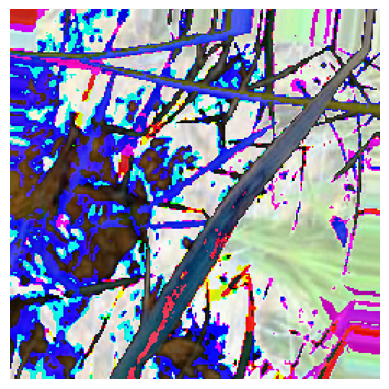

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "../data/Rice_Leaf_AUG/Rice_Leaf_AUG"
chosen_class_name = "Bacterial Leaf Blight"
chosen_img = "aug_0_4.jpg"

img_path = dataset_path + '/' + chosen_class_name + '/' + chosen_img

img = image.load_img(img_path, target_size=(256, 256))
image_array = image.img_to_array(img)
image_array = preprocess_input(image_array)
image_array = np.expand_dims(image_array, axis=0)


# Show sample image
plt.imshow(image_array[0].astype('uint8'))
plt.axis('off')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

class_name = ['Bacterial Leaf Blight','Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot', 'Sheath Blight']

class_name = label_encoder.fit_transform(class_name)
classes = label_encoder.classes_

print("Encoded class label:", class_name)
print("Decoded class label:", classes)

Encoded class label: [0 1 2 3 4 5 6]
Decoded class label: ['Bacterial Leaf Blight' 'Brown Spot' 'Healthy Rice Leaf' 'Leaf Blast'
 'Leaf scald' 'Narrow Brown Leaf Spot' 'Sheath Blight']


In [6]:
y_pred = model.predict(image_array)
y_pred_classes = np.argmax(y_pred,axis=1)
y_pred_classes

1/1 [==============================] - 1s 1s/step


array([0], dtype=int64)

In [7]:
from sklearn.metrics import classification_report

y_true = label_encoder.transform([chosen_class_name])

print(classification_report(y_true, y_pred_classes, target_names=classes[y_true]))

                       precision    recall  f1-score   support

Bacterial Leaf Blight       1.00      1.00      1.00         1

             accuracy                           1.00         1
            macro avg       1.00      1.00      1.00         1
         weighted avg       1.00      1.00      1.00         1

